### 그룹 연산
 - 복잡한 데이터를 어떤 기준에 따라 여러 그룹으로 나누어서 관찰할 수 있으며 이런 방식으로 분할 처리하는 것을 그룹 연산이라 함
 - 그룹 연산은 데이터를 집계, 변환, 필터링하는데 효율적이며 판다스 groupby() 메소드를 사용함
 - 그룹 객체 만들기(분할)
 - 그룹 연산 메소드(적용-결합)

In [29]:
import pandas as pd
import seaborn as sns

# titanic 데이터셋에서 age, sex 등 5개 열을 선택하여 데이터프레임 만들기
titanic = sns.load_dataset('titanic')
df = titanic.loc[:,['age', 'sex', 'class', 'fare', 'survived']]

print('승객 수 :', len(df))
display(df.head())

승객 수 : 891


,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
1,38.0,female,First,71.2833,1
2,26.0,female,Third,7.9250,1
3,35.0,female,First,53.1000,1
4,35.0,male,Third,8.0500,0


In [30]:
# class 열을 기준으로 분할(1개 열을 기준)
grouped = df.groupby(['class'])
print(grouped)
list(grouped)

[('First',
        age     sex  class     fare  survived
  1    38.0  female  First  71.2833         1
  3    35.0  female  First  53.1000         1
  6    54.0    male  First  51.8625         0
  11   58.0  female  First  26.5500         1
  23   28.0    male  First  35.5000         1
  ..    ...     ...    ...      ...       ...
  871  47.0  female  First  52.5542         1
  872  33.0    male  First   5.0000         0
  879  56.0  female  First  83.1583         1
  887  19.0  female  First  30.0000         1
  889  26.0    male  First  30.0000         1
  
  [216 rows x 5 columns]),
 ('Second',
        age     sex   class     fare  survived
  9    14.0  female  Second  30.0708         1
  15   55.0  female  Second  16.0000         1
  17    NaN    male  Second  13.0000         1
  20   35.0    male  Second  26.0000         0
  21   34.0    male  Second  13.0000         1
  ..    ...     ...     ...      ...       ...
  866  27.0  female  Second  13.8583         1
  874  28.0  female

In [3]:
# 그룹 객체를 iteration 으로 출력 : head() 메소드로 첫 5행만을 출력
for key, group in grouped:
    print('* key:',key)
    print('* number:',len(group))
    print(group.head())

* key: First
* number: 216
     age     sex  class     fare  survived
1   38.0  female  First  71.2833         1
3   35.0  female  First  53.1000         1
6   54.0    male  First  51.8625         0
11  58.0  female  First  26.5500         1
23  28.0    male  First  35.5000         1
* key: Second
* number: 184
     age     sex   class     fare  survived
9   14.0  female  Second  30.0708         1
15  55.0  female  Second  16.0000         1
17   NaN    male  Second  13.0000         1
20  35.0    male  Second  26.0000         0
21  34.0    male  Second  13.0000         1
* key: Third
* number: 491
    age     sex  class     fare  survived
0  22.0    male  Third   7.2500         0
2  26.0  female  Third   7.9250         1
4  35.0    male  Third   8.0500         0
5   NaN    male  Third   8.4583         0
7   2.0    male  Third  21.0750         0


In [64]:
# 연산 메소드 적용
average = grouped.mean()
display(average) # survived 의 0.~~ 은 생존확률을 의미
type(average)

,age,fare,survived
class,,,
First,38.233441,84.154687,0.629630
Second,29.877630,20.662183,0.472826
Third,25.140620,13.675550,0.242363


pandas.core.frame.DataFrame

In [5]:
stat = grouped.max()
stat2 = grouped.min()
display(stat)
display(stat2)

,age,sex,fare,survived
class,,,,
First,80.0,male,512.3292,1
Second,70.0,male,73.5000,1
Third,74.0,male,69.5500,1


,age,sex,fare,survived
class,,,,
First,0.92,female,0.0,0
Second,0.67,female,0.0,0
Third,0.42,female,0.0,0


### Q. 'Third' 그룹만을 선택해서 group3 이름으로 저장하고 통계요약표를 출력하세요.

In [65]:
group3 = grouped.get_group('Third') # Third 에 대한 그룹만 가져오기
display(group3.head())
type(group3)

,age,sex,fare,survived
0,22.0,male,7.2500,0
2,26.0,female,7.9250,1
4,35.0,male,8.0500,0
5,NaN,male,8.4583,0
7,2.0,male,21.0750,0


pandas.core.frame.DataFrame

In [7]:
group3.describe()

,age,fare,survived
count,355.000000,491.000000,491.000000
mean,25.140620,13.675550,0.242363
std,12.495398,11.778142,0.428949
min,0.420000,0.000000,0.000000
25%,18.000000,7.750000,0.000000
50%,24.000000,8.050000,0.000000
75%,32.000000,15.500000,0.000000
max,74.000000,69.550000,1.000000


In [8]:
group1 = grouped.get_group('First')
display(group1.describe())

,age,fare,survived
count,186.000000,216.000000,216.000000
mean,38.233441,84.154687,0.629630
std,14.802856,78.380373,0.484026
min,0.920000,0.000000,0.000000
25%,27.000000,30.923950,0.000000
50%,37.000000,60.287500,1.000000
75%,49.000000,93.500000,1.000000
max,80.000000,512.329200,1.000000


### Q. class 열, sex 열을 기준으로 분할하여 grouped_two에 저장하세요.

In [9]:
# class열, sex열을 기준으로 분할(여러 열을 기준으로 분할)
grouped_two = df.groupby(['class', 'sex'])

### Q. grouped_two 그룹 객체를 for문을 사용, iteration으로 출력하세요

In [10]:
# grouped_two 그룹 객체를 iteration 으로 출력
for key, group in grouped_two:
    print('* key:',key)
    print('* number:',len(group))
    display(group.head())

* key: ('First', 'female')
* number: 94


,age,sex,class,fare,survived
1,38.0,female,First,71.2833,1
3,35.0,female,First,53.1000,1
11,58.0,female,First,26.5500,1
31,NaN,female,First,146.5208,1
52,49.0,female,First,76.7292,1


* key: ('First', 'male')
* number: 122


,age,sex,class,fare,survived
6,54.0,male,First,51.8625,0
23,28.0,male,First,35.5000,1
27,19.0,male,First,263.0000,0
30,40.0,male,First,27.7208,0
34,28.0,male,First,82.1708,0


* key: ('Second', 'female')
* number: 76


,age,sex,class,fare,survived
9,14.0,female,Second,30.0708,1
15,55.0,female,Second,16.0000,1
41,27.0,female,Second,21.0000,0
43,3.0,female,Second,41.5792,1
53,29.0,female,Second,26.0000,1


* key: ('Second', 'male')
* number: 108


,age,sex,class,fare,survived
17,NaN,male,Second,13.0,1
20,35.0,male,Second,26.0,0
21,34.0,male,Second,13.0,1
33,66.0,male,Second,10.5,0
70,32.0,male,Second,10.5,0


* key: ('Third', 'female')
* number: 144


,age,sex,class,fare,survived
2,26.0,female,Third,7.9250,1
8,27.0,female,Third,11.1333,1
10,4.0,female,Third,16.7000,1
14,14.0,female,Third,7.8542,0
18,31.0,female,Third,18.0000,0


* key: ('Third', 'male')
* number: 347


,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
4,35.0,male,Third,8.0500,0
5,NaN,male,Third,8.4583,0
7,2.0,male,Third,21.0750,0
12,20.0,male,Third,8.0500,0


### Q. grouped_two 그룹 객체에 연산 메소드 적용, 각 그룹의 평균값을 구한 후 출력하세요.

In [11]:
average_two = grouped_two.mean()
display(average_two)

age        fare  survived
class  sex                                    
First  female  34.611765  106.125798  0.968085
       male    41.281386   67.226127  0.368852
Second female  28.722973   21.970121  0.921053
       male    30.740707   19.741782  0.157407
Third  female  21.750000   16.118810  0.500000
       male    26.507589   12.661633  0.135447

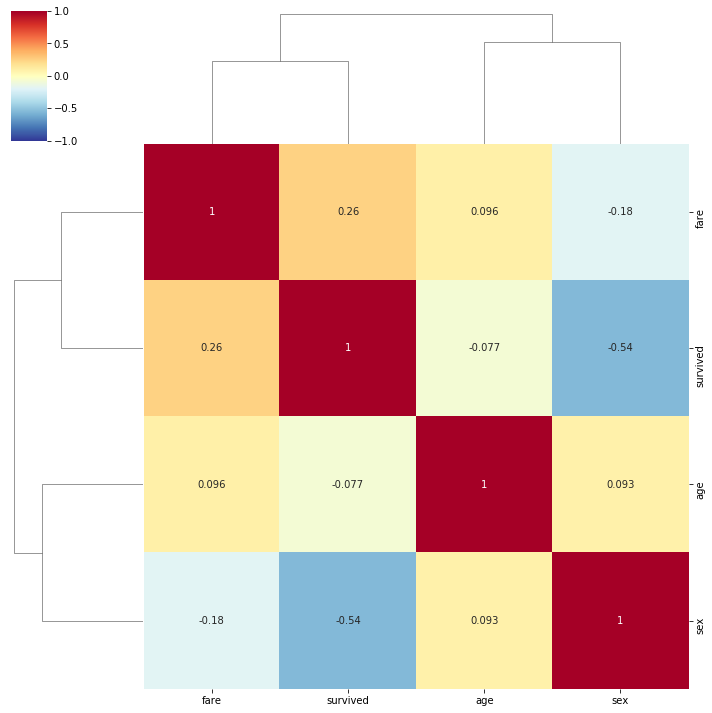

In [12]:
# Q grouped_two 그룹 객체에 연산 메소드 적용, 각 그룹의 평균값을 구한 후 출력하세요./
df=df.replace('male',1).replace('female',0).replace('First',1).replace('Second',2).replace('Third',3)
df=df.corr()
sns.clustermap(df, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )

### Q. grouped_two 그룹 객체에서 ('Third',female) 그룹을 선택해서 group3f에 저장하고 처음 5개행을 출력하세요.

In [13]:
print(type(average_two))

#grouped_two 그룹 객체에서 개별 그룹 선택하기
group3f = grouped_two.get_group(('Third','female'))
display(group3f)

<class 'pandas.core.frame.DataFrame'>


,age,sex,class,fare,survived
2,26.0,female,Third,7.9250,1
8,27.0,female,Third,11.1333,1
10,4.0,female,Third,16.7000,1
14,14.0,female,Third,7.8542,0
18,31.0,female,Third,18.0000,0
...,...,...,...,...,...
863,NaN,female,Third,69.5500,0
875,15.0,female,Third,7.2250,1
882,22.0,female,Third,10.5167,0
885,39.0,female,Third,29.1250,0


### 적용 - 결합
 - 데이터 집계(agg), 변환(transform), 필터링(filter), 객체에 함수 매핑(apply)

In [14]:
import pandas as pd
import seaborn as sns

# titanic 데이터셋에서 age, sex 등 5개 열을 선택하여 데이터프레임 만들기
df = titanic.loc[:,['age', 'sex', 'class', 'fare', 'survived']]

#class 열을 기준으로 분할
grouped = df.groupby(['class'])
# list(grouped)

In [15]:
# 각 그룹에 대한 모든 열의 표준편차를 집계하여 데이터프레임으로 변환
std_all = grouped.std() # 표준편차를 그룹으로 저장
display(std_all)
print(type(std_all))

,age,fare,survived
class,,,
First,14.802856,78.380373,0.484026
Second,14.001077,13.417399,0.500623
Third,12.495398,11.778142,0.428949


<class 'pandas.core.frame.DataFrame'>


### (Z = X-μ/σ) Z-score : 평균값에서 표준편차의 몇배 정도 떨어져 있다는 것을 평가하는 수치

 - 분자 : 개별 데이터가 평균으로부터 얼마나 떨어져 있는가
 - Z-score : 그 떨어진 정도가 그 집단의 표준편차의 몇 배 인가

###### 표준 정규분포로 환산했을 경우
 - 표준편차 ±1(1시그마)배의 범위 내에 약 68% 데이터가 들어감
 - 표준편차 ±2(2시그마)배의 범위 내에 약 95% 데이터가 들어감
 - 표준편차 ±3(3시그마)배의 범위 내에 약 99% 데이터가 들어감

In [16]:
# 각 그룹에 대한 fare 열의 표준편차를 집계하여 시리즈로 반환
std_fare = grouped.fare.std()
display(std_fare)
print(type(std_fare))

class
First     78.380373
Second    13.417399
Third     11.778142
Name: fare, dtype: float64

<class 'pandas.core.series.Series'>


### Q.최대값-최소값을 반환하는 사용자함수를 정의하고 agg() 함수에 인수로 전달하여 그룹별로 집계하여 agg_minmax 이름으로 저장 후 처음 5개 행을 출력하세요.

In [17]:
def min_max(x):
    return x.max() - x.min()

agg_minmax = grouped.agg(min_max)
display(agg_minmax.head()) # 각 클래스(객실등급)별로 (최대값 - 최소값)의 결과 차이를 볼 수 있다.(분포 확인 가능)

,age,fare,survived
class,,,
First,79.08,512.3292,1
Second,69.33,73.5000,1
Third,73.58,69.5500,1


In [18]:
# 여러 함수를 각 열에 동일하게 적용하여 집계
agg_all = grouped.agg(['min','max'])
display(agg_all.head())

age           sex       fare           survived    
         min   max     min   max  min       max      min max
class                                                       
First   0.92  80.0  female  male  0.0  512.3292        0   1
Second  0.67  70.0  female  male  0.0   73.5000        0   1
Third   0.42  74.0  female  male  0.0   69.5500        0   1

### Q. grouped 에 각 열마다 다른 함수를 적용하여 agg_sep이름으로 저장하고 출력하세요.
('fare'는 'min, max', 'age'는 'mean)

In [19]:
# 각 열마다 다른 함수를 적용하여 집계
agg_sep = grouped.agg({'fare':['min','max'], 'age':'mean'})
display(agg_sep.head())

fare                  age
        min       max       mean
class                           
First   0.0  512.3292  38.233441
Second  0.0   73.5000  29.877630
Third   0.0   69.5500  25.140620

In [61]:
import pandas as pd
import seaborn as sns

#titanic 데이터셋에서 age, sex 등 5개 열을 선택하여 데이터프레임 만들기
titanic = sns.load_dataset('titanic')
df = titanic.loc[:,['age','sex','class','fare','survived']]

#class 열을 기준으로 분할
grouped = df.groupby(['class'])
display(grouped)
display(grouped.count())
display(grouped.sum())
display(list(grouped))

,age,sex,fare,survived
class,,,,
First,186,216,216,216
Second,173,184,184,184
Third,355,491,491,491


,age,fare,survived
class,,,
First,7111.42,18177.4125,136
Second,5168.83,3801.8417,87
Third,8924.92,6714.6951,119


[('First',
        age     sex  class     fare  survived
  1    38.0  female  First  71.2833         1
  3    35.0  female  First  53.1000         1
  6    54.0    male  First  51.8625         0
  11   58.0  female  First  26.5500         1
  23   28.0    male  First  35.5000         1
  ..    ...     ...    ...      ...       ...
  871  47.0  female  First  52.5542         1
  872  33.0    male  First   5.0000         0
  879  56.0  female  First  83.1583         1
  887  19.0  female  First  30.0000         1
  889  26.0    male  First  30.0000         1
  
  [216 rows x 5 columns]),
 ('Second',
        age     sex   class     fare  survived
  9    14.0  female  Second  30.0708         1
  15   55.0  female  Second  16.0000         1
  17    NaN    male  Second  13.0000         1
  20   35.0    male  Second  26.0000         0
  21   34.0    male  Second  13.0000         1
  ..    ...     ...     ...      ...       ...
  866  27.0  female  Second  13.8583         1
  874  28.0  female

### Q.데이터 개수가 200개 이상인 그룹만을 필터링하여 데이터프레임으로 반환하여 grouped_filter 이름으로 저장 후 처음 5개 행을 출력하세요

In [52]:
grouped_filter = grouped.filter(lambda x : len(x) >= 200) # 그룹의 길이가 200 이상인 것을 조건으로 filtering 하라는 의미
display(grouped_filter.head())
print(type(grouped_filter))
# list(grouped)

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
1,38.0,female,First,71.2833,1
2,26.0,female,Third,7.9250,1
3,35.0,female,First,53.1000,1
4,35.0,male,Third,8.0500,0


<class 'pandas.core.frame.DataFrame'>


### Q. age 열의 평균이 30보다 작은 그룹만을 필터링하여 데이터프레임으로 반환하여 age_filter 이름으로 저장 후 끝에서 5개 행을 출력하세요.

In [22]:
age_filter = grouped.filter(lambda x : x.age.mean() < 30)
display(age_filter)
print(type(age_filter))

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
2,26.0,female,Third,7.9250,1
4,35.0,male,Third,8.0500,0
5,NaN,male,Third,8.4583,0
7,2.0,male,Third,21.0750,0
...,...,...,...,...,...
884,25.0,male,Third,7.0500,0
885,39.0,female,Third,29.1250,0
886,27.0,male,Second,13.0000,0
888,NaN,female,Third,23.4500,0


<class 'pandas.core.frame.DataFrame'>


### Q. Class 각 그룹별 요약 통계정보를 집계 출력하세요
 - 소스 : sns.load_dataset('titanic')
 - 컬럼 선택 : ['age','sex','class','fare','survived']

In [23]:
titanic = sns.load_dataset('titanic')
df = titanic.loc[:,['age','sex','class','fare','survived']]
grouped = df.groupby(['class'])

# 집계 : 각 그룹별 요약 통계정보를 집계
agg_grouped = grouped.apply(lambda x : x.describe())
display(agg_grouped)

age        fare    survived
class                                           
First  count  186.000000  216.000000  216.000000
       mean    38.233441   84.154687    0.629630
       std     14.802856   78.380373    0.484026
       min      0.920000    0.000000    0.000000
       25%     27.000000   30.923950    0.000000
       50%     37.000000   60.287500    1.000000
       75%     49.000000   93.500000    1.000000
       max     80.000000  512.329200    1.000000
Second count  173.000000  184.000000  184.000000
       mean    29.877630   20.662183    0.472826
       std     14.001077   13.417399    0.500623
       min      0.670000    0.000000    0.000000
       25%     23.000000   13.000000    0.000000
       50%     29.000000   14.250000    0.000000
       75%     36.000000   26.000000    1.000000
       max     70.000000   73.500000    1.000000
Third  count  355.000000  491.000000  491.000000
       mean    25.140620   13.675550    0.242363
       std     12.495398   11.778142    0.428949
       min      0.420000    0.000000    0.000000
       25%     18.000000    7.750000    0.000000
       50%     24.000000    8.050000    0.000000
       75%     32.000000   15.500000    0.000000
       max     74.000000   69.550000    1.000000

### Z-score를 계산하는 사용자 함수 정의

0   -0.251342
1   -0.015770
2    0.068776
3   -0.218434
4    0.789041
Name: age, dtype: float64


class
First     AxesSubplot(0.125,0.125;0.775x0.755)
Second    AxesSubplot(0.125,0.125;0.775x0.755)
Third     AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

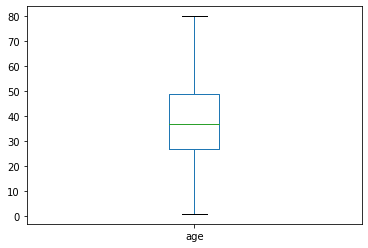

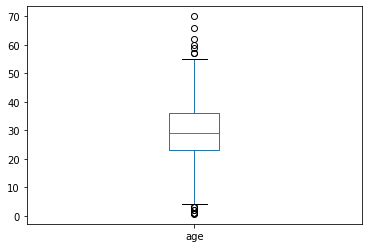

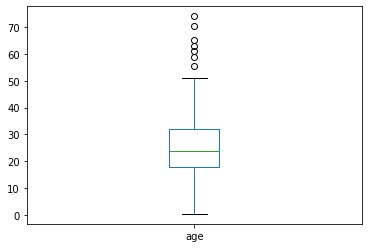

In [66]:
def z_score(df):
    return (df-df.mean()) / df.std()

age_zscore = grouped.age.apply(z_score)    #기본값 axis=0
print(age_zscore.head())

grouped.plot(kind='box',y='age') # 나이 시각적으로 보기

In [67]:
# zscore 구하기
# from scipy.stats import zmap
# import numpy as np
# test = np.array([-0.33, -0.31, 0.55, 0.05, 0.93])
# ctrl = np.array([[-0.65, 1.09, -1.67, -0.32, 1.26],
#                [0.39, 0.68, -0.28, -0.75, -0.72]])
# zmap(test,ctrl)

# test2 = np.expand_dims(test, axis=0)
# test2 = np.concatenate((test2, ctrl))
# zmap(test2,ctrl)
# # z = (x - x.mean(axis=0)) / x.std(axis=0)

In [74]:
# 필터링 : age열의 데이터 평균이 30보다 작은 그룹만들 필터링하여 출력
age_filter = grouped.apply(lambda x : x['age'].mean() < 30)
display(age_filter) # First 만 30보다 크기 때문에 False
for x in age_filter.index:
    if age_filter[x]==True:
        age_filter_df = grouped.get_group(x)
        display(age_filter_df.head())

class
First     False
Second     True
Third      True
dtype: bool

,age,sex,fare,survived
9,14.0,female,30.0708,1
15,55.0,female,16.0000,1
17,NaN,male,13.0000,1
20,35.0,male,26.0000,0
21,34.0,male,13.0000,1


,age,sex,fare,survived
0,22.0,male,7.2500,0
2,26.0,female,7.9250,1
4,35.0,male,8.0500,0
5,NaN,male,8.4583,0
7,2.0,male,21.0750,0


In [77]:
import pandas as pd
import seaborn as sns
# titanic 데이터셋에서 age, sex 등 5개 열을 선택하여 데이터프레임 만들기
titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age','sex','class','fare','survived']]

# class 열, sex열을 기준으로 분할
grouped = df.groupby(['class','sex'])

In [81]:
# 그룹 객체에 연산 메서드 적용
print(type(grouped))
gdf = grouped.mean() #std, min, max 원하는 그룹별로 나눠서 사용 가능
display(gdf) # 6개의 그룹 출력
print(type(gdf))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


age        fare  survived
class  sex                                    
First  female  34.611765  106.125798  0.968085
       male    41.281386   67.226127  0.368852
Second female  28.722973   21.970121  0.921053
       male    30.740707   19.741782  0.157407
Third  female  21.750000   16.118810  0.500000
       male    26.507589   12.661633  0.135447

<class 'pandas.core.frame.DataFrame'>


### Q. class 값이 First인 행을 선택하여 출력하세요

In [88]:
# class 값이 First인 행을 선택하여 출력
display(gdf.loc['First']) # display(gdf.loc['First','female']) 처럼 원하는 행만 선택 가능

,age,fare,survived
sex,,,
female,34.611765,106.125798,0.968085
male,41.281386,67.226127,0.368852


### Q. class 값이 First 이고, sex 값이 female 인 행을 선택하여 출력하세요

In [90]:
display(gdf.loc['First','female'])

age          34.611765
fare        106.125798
survived      0.968085
Name: (First, female), dtype: float64

### Q. sex값이 male 인 행을 선택하여 출력하세요

In [96]:
# sex 값이 male  인 행을 선택하여 출력
display(gdf.xs('male', level='sex'))
# help(gdf.xs)
#df.xs(('bird', 'walks'), level=[0, 'locomotion'])

,age,fare,survived
class,,,
First,41.281386,67.226127,0.368852
Second,30.740707,19.741782,0.157407
Third,26.507589,12.661633,0.135447


### 피벗
 - 피벗 테이블을 구성하는 4가지 요소(행 인덱스, 열 인덱스, 데이터 값, 데이터 집계함수)에 적용할 데이터프레임의 열을 각각 지정하여 함수의 인자로 전달

In [99]:
import pandas as pd
import seaborn as sns

# IPython 디스플레이 설정 변경
pd.set_option('display.max_columns',10)    #출력할 최대 열의 개수
pd.set_option('display.max_colwidth',10)   #출력할 열의 너비
# titanic 데이터셋에서 age, sex 등 5개 열을 선택하여 데이터프레임 만들기
titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age','sex','class','fare','survived']]
display(df.head())

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
1,38.0,female,First,71.2833,1
2,26.0,female,Third,7.9250,1
3,35.0,female,First,53.1000,1
4,35.0,male,Third,8.0500,0


In [104]:
# 행, 열, 값, 집계에 사용할 열을 1개씩 지정 - 평균 집계
pdf1 = pd.pivot_table(df,                 # 피벗할 데이터프레임
                     index='class',       # 행 위치에 들어갈 열
                     columns='sex',       # 열 위치에 들어갈 열
                     values='age',        # 데이터로 사용할 열
                     aggfunc='mean')      # 데이터 집계 함수

display(pdf1.head())

sex,female,male
class,,
First,34.611765,41.281386
Second,28.722973,30.740707
Third,21.750000,26.507589


### Q. 값에 적용하는 집계 함수를 2개 이상 지정할 수 있다. mean, sum을 지정하여 출력하세요.

In [108]:
pdf2 = pd.pivot_table(df,                 # 피벗할 데이터프레임
                     index='class',       # 행 위치에 들어갈 열
                     columns='sex',       # 열 위치에 들어갈 열
                     values='survived',        # 데이터로 사용할 열
                     aggfunc=['mean','sum'])      # 데이터 집계 함수

display(pdf2.head())

mean              sum     
sex       female      male female male
class                                 
First   0.968085  0.368852     91   45
Second  0.921053  0.157407     70   17
Third   0.500000  0.135447     72   47

### Q. 행, 열, 값에 사용할 열을 2개 이상 지정할 수 있다. index, values, aggfunc에 각각 2개를 지정하여 출력하세요.

In [116]:
pdf3 = pd.pivot_table(df,                 # 피벗할 데이터프레임
                     index=['class','sex'],       # 행 위치에 들어갈 열
                     columns='survived',       # 열 위치에 들어갈 열
                     values=['age','fare'],        # 데이터로 사용할 열
                     aggfunc=['mean','max'])      # 데이터 집계 함수

display(pdf3)

mean                                    max                \
                     age                  fare              age          fare   
survived               0          1          0          1     0     1       0   
class  sex                                                                      
First  female  25.666667  34.939024  110.60...  105.97...  50.0  63.0  151.55   
       male    44.581967  36.248000  62.894910  74.637320  71.0  80.0  263.00   
Second female  36.000000  28.080882  18.250000  22.288989  57.0  55.0   26.00   
       male    33.369048  16.022000  19.488965  21.095100  70.0  62.0   73.50   
Third  female  23.818182  19.329787  19.773093  12.464526  48.0  63.0   69.55   
       male    27.255814  22.274211  12.204469  15.579696  74.0  45.0   69.55   

                         
                         
survived              1  
class  sex               
First  female  512.3292  
       male    512.3292  
Second female   65.0000  
       male     39.0000  
Third  female   31.3875  
       male     56.4958

In [119]:
pd.set_option('display.max_columns',10)
display(pdf3)

mean                                    max                \
                     age                  fare              age          fare   
survived               0          1          0          1     0     1       0   
class  sex                                                                      
First  female  25.666667  34.939024  110.60...  105.97...  50.0  63.0  151.55   
       male    44.581967  36.248000  62.894910  74.637320  71.0  80.0  263.00   
Second female  36.000000  28.080882  18.250000  22.288989  57.0  55.0   26.00   
       male    33.369048  16.022000  19.488965  21.095100  70.0  62.0   73.50   
Third  female  23.818182  19.329787  19.773093  12.464526  48.0  63.0   69.55   
       male    27.255814  22.274211  12.204469  15.579696  74.0  45.0   69.55   

                         
                         
survived              1  
class  sex               
First  female  512.3292  
       male    512.3292  
Second female   65.0000  
       male     39.0000  
Third  female   31.3875  
       male     56.4958

### Q. pdf3에서 xs인덱서를 사용하여 다음사항을 수행 후 출력하세요. 
 - 행 인덱스가 First인 행을 선택
 - 행 인덱스가('First','female')인 행을 선택
 - 행 인덱스의 sex 레벨이 male인 행을 선택
 - Second, male이고, level=[0,'sex'] 행을 선택
 - 열 인덱스가 mean인 데이터를 선택
 - 열 인덱스가 ('mean','age')인 데이터 선택
 - survived 레벨이 1인 데이터 선택

In [134]:
# xs 인덱서 사용 - 행 선택(default:axis=0)
pdf3.loc['First'] # 행 인덱스가 First인 행을 선택

mean                                    max                \
                age                  fare              age          fare   
survived          0          1          0          1     0     1       0   
sex                                                                        
female    25.666667  34.939024  110.60...  105.97...  50.0  63.0  151.55   
male      44.581967  36.248000  62.894910  74.637320  71.0  80.0  263.00   

                    
                    
survived         1  
sex                 
female    512.3292  
male      512.3292

In [135]:
pdf3.loc['First','female'] #행 인덱스가('First','female')인 행을 선택

            survived
mean  age   0           25.666667
            1           34.939024
      fare  0           110.60...
            1           105.97...
max   age   0           50.000000
            1           63.000000
      fare  0           151.55...
            1           512.32...
Name: (First, female), dtype: float64

In [136]:
pdf3.xs('male', level='sex') #행 인덱스의 sex 레벨이 male인 행을 선택

mean                                    max                \
                age                  fare              age          fare   
survived          0          1          0          1     0     1       0   
class                                                                      
First     44.581967  36.248000  62.894910  74.637320  71.0  80.0  263.00   
Second    33.369048  16.022000  19.488965  21.095100  70.0  62.0   73.50   
Third     27.255814  22.274211  12.204469  15.579696  74.0  45.0   69.55   

                    
                    
survived         1  
class               
First     512.3292  
Second     39.0000  
Third      56.4958

In [138]:
display(pdf3.xs(('Second','male'), level=[0, 'sex']))# Second, male이고, level=[0,'sex'] 행을 선택

mean                               max                  
                   age               fare            age        fare      
survived             0       1          0        1     0     1     0     1
class  sex                                                                
Second male  33.369048  16.022  19.488965  21.0951  70.0  62.0  73.5  39.0

In [140]:
pdf3.xs('mean',axis=1) # 열 인덱스가 mean인 데이터를 선택

age                  fare           
survived               0          1          0          1
class  sex                                               
First  female  25.666667  34.939024  110.60...  105.97...
       male    44.581967  36.248000  62.894910  74.637320
Second female  36.000000  28.080882  18.250000  22.288989
       male    33.369048  16.022000  19.488965  21.095100
Third  female  23.818182  19.329787  19.773093  12.464526
       male    27.255814  22.274211  12.204469  15.579696

In [142]:
pdf3.xs(('mean','age'),axis=1) # 열 인덱스가 ('mean','age')인 데이터 선택

survived               0          1
class  sex                         
First  female  25.666667  34.939024
       male    44.581967  36.248000
Second female  36.000000  28.080882
       male    33.369048  16.022000
Third  female  23.818182  19.329787
       male    27.255814  22.274211

In [169]:
pdf3.xs(1,level='survived',axis=1) # survived 레벨이 1인 데이터 선택(살아있는애들)

mean              max          
                     age       fare   age      fare
class  sex                                         
First  female  34.939024  105.97...  63.0  512.3292
       male    36.248000  74.637320  80.0  512.3292
Second female  28.080882  22.288989  55.0   65.0000
       male    16.022000  21.095100  62.0   39.0000
Third  female  19.329787  12.464526  63.0   31.3875
       male    22.274211  15.579696  45.0   56.4958